## Data preparation and modules

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [56]:
X_train = pd.read_csv("data/X_train.csv")
Y_train  = pd.read_csv("data/Y_train.csv")
X_test = pd.read_csv("data/X_test.csv")


In [57]:
X_train.head()

,site_name,company_name,link,latitude,longitude,address,homepage,phone,sales_phone,email,sales_email,opening_hours,site_type,id,image_path
0,Carrières Daniel,NaN,https://www.google.com/maps/place/Carri%C3%A8r...,43.0477,-0.0473,"Le Village, 65100 Ger, France",NaN,#ERROR!,NaN,NaN,NaN,NaN,Quarry,949a5a8b-8e9d-40c5-8100-2f30a3e82f7b,data/images/train/949a5a8b-8e9d-40c5-8100-2f30...
1,Malet Horgues.,NaN,https://www.google.com/maps/place/Malet+Horgue...,43.1903,0.0916,"Chem. de Mansas, 65310 Horgues, France",NaN,NaN,NaN,NaN,NaN,NaN,Quarry,044d1092-4bb7-4e09-b073-113037a0a196,data/images/train/044d1092-4bb7-4e09-b073-1130...
2,Carrieres Plo,NaN,https://www.google.com/maps/place/Carrieres+Pl...,42.9605,0.3937,"Village, 65410 Ilhet, France",NaN,#ERROR!,NaN,NaN,NaN,NaN,Quarry,738e1bd8-6a64-40a9-85ff-c442965db618,data/images/train/738e1bd8-6a64-40a9-85ff-c442...
3,Dastugue Jean et Fils,NaN,https://www.google.com/maps/place/Dastugue+Jea...,43.0689,0.3865,"Rue du Bas Mour, 65250 La Barthe-de-Neste, France",NaN,#ERROR!,NaN,NaN,NaN,NaN,Quarry,1e07b5a8-b697-4971-bc39-b57d05084eea,data/images/train/1e07b5a8-b697-4971-bc39-b57d...
4,Pema Carrières Du Roc,NaN,https://www.google.com/maps/place/Pema+Carri%C...,43.6493,0.3439,"32320 Riguepeu, France",NaN,#ERROR!,NaN,NaN,NaN,NaN,Quarry,e96a46a3-9be3-4d3d-a3ec-2563c0e13ef2,data/images/train/e96a46a3-9be3-4d3d-a3ec-2563...


In [58]:
Y_train.head()

,output
0,1
1,1
2,0
3,0
4,0


In [59]:
X_test.head()

,site_name,company_name,link,latitude,longitude,address,homepage,phone,sales_phone,email,sales_email,opening_hours,site_type,id,image_path
0,"New Enterprise Stone &amp; Lime Co., Inc. -- A...",Unknown,https://www.google.com/maps/place/New+Enterpri...,40.0046,-78.4190,"526 Ashcom Rd, Everett, PA 15537, United States",nesl.com,+1 800-426-7334,NaN,NaN,NaN,NaN,Quarry,2c454368-0cff-4195-8290-4cfaab9082ec,data/images/test/2c454368-0cff-4195-8290-4cfaa...
1,"New Enterprise Stone &amp; Lime Co., Inc. -- R...",Unknown,https://www.google.com/maps/place/New+Enterpri...,40.3455,-78.4039,"8078 Woodbury Pike, Roaring Spring, PA 16673, ...",nesl.com,+1 800-426-7334,NaN,NaN,NaN,NaN,Quarry,8ac10caa-24a9-475e-9dc7-4532cb818bff,data/images/test/8ac10caa-24a9-475e-9dc7-4532c...
2,"New Enterprise Stone &amp; Lime Co., Inc. -- T...",Unknown,https://www.google.com/maps/place/New+Enterpri...,40.6653,-78.2130,"853 Birmingham Pike, Tyrone, PA 16686, United ...",nesl.com,+1 800-426-7334,NaN,NaN,NaN,NaN,Aggregate supplier,dc097ae3-d1a9-4c88-aec6-82858d70a8eb,data/images/test/dc097ae3-d1a9-4c88-aec6-82858...
3,"New Enterprise Stone &amp; Lime Co., Inc. -- U...",Unknown,https://www.google.com/maps/place/New+Enterpri...,40.6205,-78.1673,"3279 Johnson Hill, Tyrone, PA 16686, United St...",nesl.com,+1 800-426-7334,NaN,NaN,NaN,NaN,Quarry,aff045a5-d1d1-4713-8a99-99371965bc78,data/images/test/aff045a5-d1d1-4713-8a99-99371...
4,Penn State Stone Valley,Unknown,https://www.google.com/maps/place/Penn+State+S...,40.4848,-78.0103,"RR 2, Huntingdon, PA 16652, United States",studentaffairs.psu.edu,+1 814-667-3458,NaN,NaN,NaN,NaN,Stone supplier,b5240514-6833-49e4-902a-887495ea6952,data/images/test/b5240514-6833-49e4-902a-88749...


## site_type

In [60]:
X_train.site_type.unique()

array(['Quarry', 'Recycling center', 'Gravel pit', 'Manufacturer',
       'Natural stone supplier', 'Granite supplier',
       'Concrete contractor', 'Ravine', 'Mine',
       'Building materials supplier'], dtype=object)

In [61]:
X_test.site_type.unique()

array(['Quarry', 'Aggregate supplier', 'Stone supplier',
       'General contractor', 'Sand plant', 'Sand & gravel supplier',
       'Crushed stone supplier', 'Gravel pit', 'Mine', 'Mining company',
       nan, 'Ravine', 'Ready mix concrete supplier', 'Natural feature',
       'River', 'Natural stone supplier', 'Manufacturer', 'Rock climbing',
       'Construction company', 'Granite supplier', 'Superfund site',
       'Countertop store', 'Lake', 'Banquet hall', 'Mountain peak',
       'Place of worship', 'Shoe store', 'Park', 'Apartment building',
       'Veterans center', 'Honey farm', 'ATM', 'Training centre',
       'Pentecostal church', 'SCUBA tour agency', 'Tourist attraction',
       'Commercial refrigeration', 'Janitorial service',
       'Septic system service', 'Pharmacy', 'Engraver',
       'Gymnastics center', 'Historical landmark', 'Garden center',
       'Self-storage facility', 'Excavating contractor', 'Plumber',
       'Recreation center', 'Hiking area', 'Pond', 'Quilt s

In [62]:
for dataset in [X_train,
                X_test] :
    display(f'Quarry proportion within the dataset : {len(dataset.loc[dataset.site_type=="Quarry"]) / len(dataset)}')

'Quarry proportion within the dataset : 0.9692011549566891'

'Quarry proportion within the dataset : 0.3485714285714286'

A small part of the train set is not labellised as quarry, but the labels are close it may enter in a large definition of quarry.

Only one third of the test set is labellised as quarry, it is probably for the test purpose. Therefore, we won't use the site_type col and perform a classification as if all the images were potentially a quarry.

# Open images

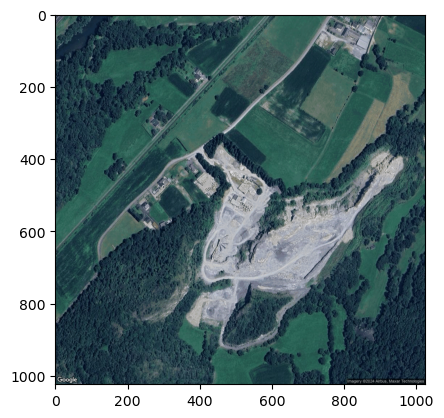

In [63]:
image = Image.open(X_train.image_path[0])
plt.imshow(image)

In [64]:
my_array.shape

(1024, 1024, 3)

In [65]:
my_array = np.array(image)
f"The pixels values varies from {my_array.min()} to {my_array.max()} the image has the following shape {my_array.shape}"

'The pixels values varies from 0 to 254 the image has the following shape (1024, 1024, 3)'

## Check images size 

In [66]:
def check_image_sizes(image_paths):
    sizes = set()
    for path in image_paths:
        with Image.open(path) as img:
            sizes.add(img.size)
    return sizes

# Example usage with X_train and X_test image paths
train_image_sizes = check_image_sizes(X_train['image_path'])
test_image_sizes = check_image_sizes(X_test['image_path'])

# Display the sizes
print(f"Unique sizes in training images: {train_image_sizes}")
print(f"Unique sizes in test images: {test_image_sizes}")

# Check if all images are the same size
if len(train_image_sizes) == 1:
    print("All training images are of the same size.")
else:
    print("Training images have different sizes.")

if len(test_image_sizes) == 1:
    print("All test images are of the same size.")
else:
    print("Test images have different sizes.")

Unique sizes in training images: {(1024, 1024)}
Unique sizes in test images: {(1024, 1024)}
All training images are of the same size.
All test images are of the same size.
